# Домашнее задание 3 - PANDAS

 *Царитова Нина НПМбд-01-19*

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [70]:
%pylab inline  
# import almost all we need
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['maximum', 'minimum', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [71]:
pass_data = pd.read_csv('data.csv')
pass_data.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?

In [72]:
pass_data['order_id'].nunique()

1834

2. Сколько уникальных категорий товара было куплено? (item_name)

In [73]:
pass_data['item_name'].nunique()

50

#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

В колонке choice_description есть пропуски в данных:

In [74]:
print(pass_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 126.4+ KB
None


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [75]:
pass_data = pass_data.fillna(' ')

#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

Тип колонки object

In [76]:
pass_data['price'] = pass_data['item_price'].apply(lambda x: x.replace('$','')).astype(float)
pass_data

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


Какая средняя/минимальная/максимальная цена у товара? 

In [77]:
maximum = pass_data['price'].max() 
minimum = pass_data['price'].min()
mean = pass_data.groupby('item_name')['price'].mean().mean().round(2)

print("Средняя цена товара:", mean, "\nМинимальная цена товара:", minimum,"\nМаксимальная цена товара:", maximum)

Средняя цена товара: 7.61 
Минимальная цена товара: 1.09 
Максимальная цена товара: 44.25


Удалите старую колонку с ценой.

In [78]:
pass_data = pass_data.drop(columns='item_price')
pass_data

,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [79]:
a = pass_data[pass_data['quantity'] == 1].drop_duplicates('item_name').nsmallest(5, ['price'])
print("5 самых дешёвых товаров:", *a['item_name'],  sep = "\n") 
b = pass_data[pass_data['quantity'] == 1].drop_duplicates('item_name').nlargest(5, ['price'])
print("5 самых дорогих товаров:", *b['item_name'],  sep = "\n")

5 самых дешёвых товаров:
Canned Soda
Bottled Water
Canned Soft Drink
Side of Chips
Chips
5 самых дорогих товаров:
Steak Salad Bowl
Carnitas Salad Bowl
Barbacoa Salad Bowl
Steak Burrito
Barbacoa Bowl


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [80]:
pass_data[(pass_data.item_name == 'Chicken Bowl') & (pass_data.quantity > 1)].shape[0]

33

#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [81]:
chek = pass_data.groupby('order_id')['price'].sum().mean().round(2)
tovar = pass_data.groupby('order_id')['quantity'].sum().mean().round()

print("Средний чек:", chek, "\nВ среднем товаров:", tovar)

Средний чек: 18.81 
В среднем товаров: 3.0


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [82]:
pass_data.groupby('order_id').size()[pass_data.groupby("order_id")['quantity'].sum() ==1].count()

56

#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [83]:
print(*pass_data['item_name'].mode())

Chicken Bowl


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [84]:
b = pass_data[pass_data["item_name"].str.contains("Burrito")]

print("Виды :", *b["item_name"].drop_duplicates(), sep = '\n')
print("Чаще всего покупают:", *b['item_name'].mode())

b = b[b['quantity'] == 1].drop_duplicates("item_name").nlargest(1, ['price'])
print("Самый дорогой:", *b['item_name'])


Виды :
Steak Burrito
Chicken Burrito
Barbacoa Burrito
Carnitas Burrito
Veggie Burrito
Burrito
Чаще всего покупают: Chicken Burrito
Самый дорогой: Steak Burrito


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [85]:
pass_data.groupby('order_id').size()[pass_data.groupby('order_id')['price'].max().T / pass_data.groupby('order_id')['price'].sum().T > 0.4].count()

1624

#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [86]:
d = pass_data[(pass_data["choice_description"].str.contains("Diet Coke")) & (pass_data["item_name"] == "Canned Soft Drink")]
print(((d["quantity"] * 1.35).T.sum() / d["price"].sum() - 1) * 100, "%")


7.999999999999985 %


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [87]:
import numpy as np

In [88]:
mtx = pd.DataFrame(np.random.rand(10, 3))
mtx = mtx.rename(columns = {0: "index", 1: "column1", 2: "column2"})
mtx

,index,column1,column2
0,0.795707,0.697600,0.319499
1,0.949048,0.070684,0.308786
2,0.792157,0.898137,0.638379
3,0.453140,0.789422,0.993623
4,0.017771,0.220700,0.308612
5,0.660319,0.821517,0.864191
6,0.348473,0.342939,0.311508
7,0.208628,0.997517,0.048249
8,0.828421,0.974190,0.197373
9,0.768859,0.209691,0.740870


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [89]:
mtx.to_csv('mtx.csv', index=False, header=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [90]:
%matplotlib inline  # нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

UsageError: unrecognized arguments: # нужно для отображения графиков внутри ноутбука


На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [91]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=pass_data.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(pass_data.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
pass_data['date'] = pass_data.order_id.map(dates['date'])
pass_data

,order_id,quantity,item_name,choice_description,price,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2018-01-23
1,1,1,Izze,[Clementine],3.39,2018-01-23
2,1,1,Nantucket Nectar,[Apple],3.39,2018-01-23
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2018-01-23
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-12
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,2018-01-16
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,2018-01-16
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,2018-01-17
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,2018-01-17


#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

Text(0.5, 1.0, 'Гистрограмма средних цен товаров')

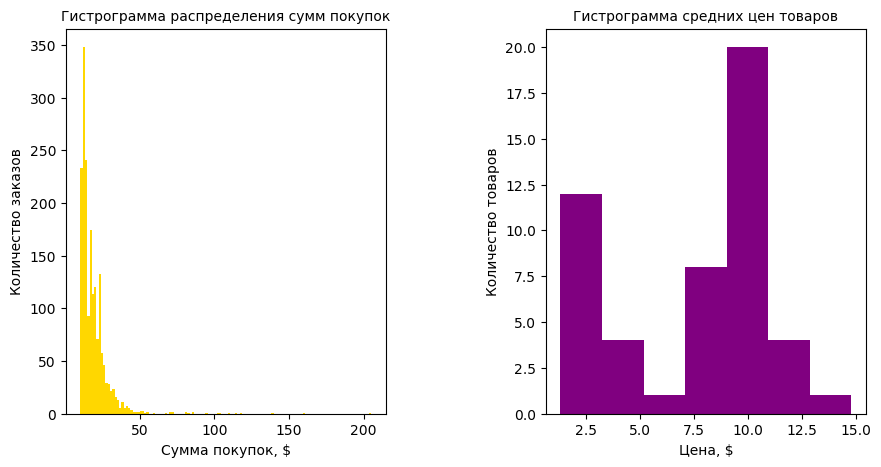

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 5))
plt.subplots_adjust(wspace=0.5, left=1, right=2)

ax1.hist(pass_data.groupby('order_id')['price'].sum().T, bins = 'auto', color = 'gold')
ax1.set_xlabel("Сумма покупок, $")
ax1.set_ylabel("Количество заказов")
ax1.set_title("Гистрограмма распределения сумм покупок", size = 10)

ax2.hist(pass_data.groupby('item_name')['price'].mean().T, bins = 'auto', color = 'purple')
ax2.set_xlabel("Цена, $")
ax2.set_ylabel("Количество товаров")
ax2.set_title("Гистрограмма средних цен товаров", size = 10)

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

Text(0, 0.5, 'сумма покупок')

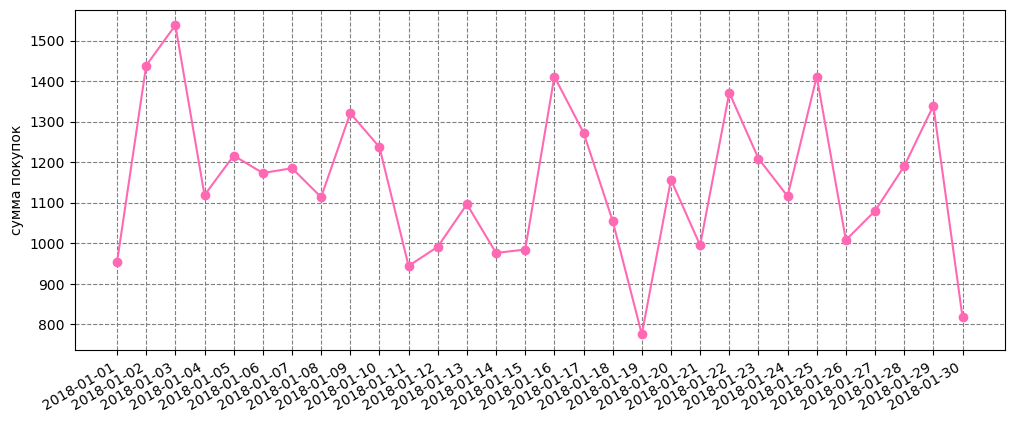

In [93]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
date_sums = pass_data.groupby('date')['price'].sum()
plt.plot(date_sums.index.values, date_sums.values, marker = 'o', color = 'hotpink')
plt.gcf().autofmt_xdate()
plt.grid(which='major', linestyle='--', color='gray', zorder=0)
plt.ylabel('сумма покупок')

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

In [94]:
def gradientbars(bars,ydata,cmap):
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    ax.axis(lim)
    for bar in bars:
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0,1*h/max(ydata),256)).T
        #zorder of 2 to get gradients above the facecolor, but below the bar outlines
        ax.imshow(grad, extent=[x,x+w,y,y+h], origin='lower',aspect="auto",zorder=2, norm=cm.colors.NoNorm(vmin=0,vmax=1),cmap=plt.get_cmap(cmap))

In [95]:
pass_data['date'] = pd.to_datetime(pass_data['date'], errors='coerce')
pass_data['weekday'] = pass_data['date'].dt.day_name()
pass_data.groupby(['weekday', 'order_id'])['price'].sum().groupby('weekday').mean()

weekday
Friday       17.738311
Monday       19.404377
Saturday     18.700083
Sunday       18.340380
Thursday     19.193305
Tuesday      18.954862
Wednesday    19.057897
Name: price, dtype: float64

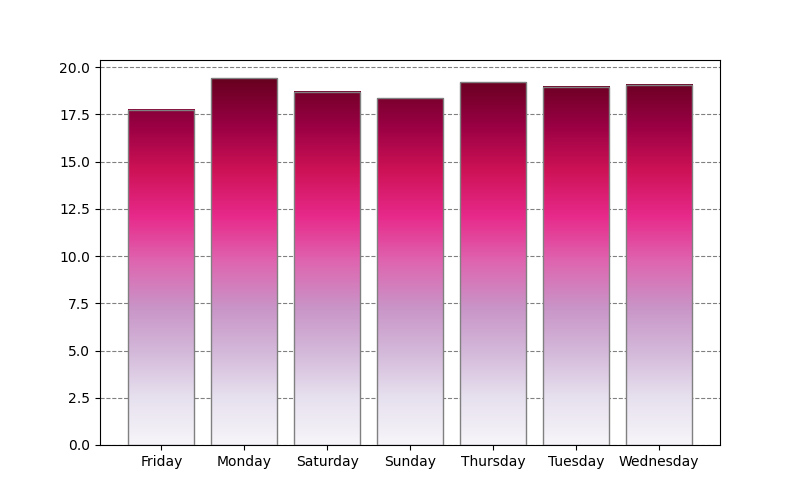

<Figure size 800x500 with 0 Axes>

In [96]:
fig, ax = plt.subplots(figsize = (8, 5))
rez = pass_data.groupby(['weekday', 'order_id'])['price'].sum().groupby('weekday').mean().T
week_day = ['Friday', 'Monday','Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

# zorder=0 sends gridlines to the back
ax.grid(which='major', axis='y', linestyle='--', color='gray', zorder=0)
# zorder=3 makes our edges show
my_bar = ax.bar(week_day, rez, edgecolor='gray', zorder=3)
gradientbars(my_bar, rez, 'PuRd')
plt.show()

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

Text(0.5, 1.0, 'график зависимости денег за товар от купленного количества')

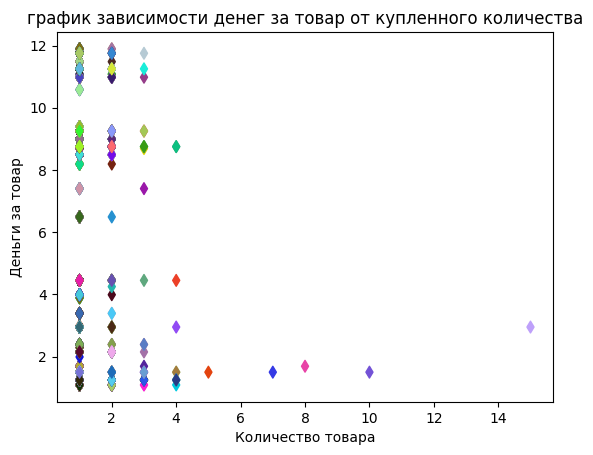

In [97]:
price = pass_data['price'] / pass_data['quantity']
plt.scatter(pass_data['quantity'], price,c=np.random.rand(len(price),3), marker='d')

plt.xlabel("Количество товара")
plt.ylabel("Деньги за товар")
plt.title('график зависимости денег за товар от купленного количества')

Сохраните график в формате pdf (так он останется векторизованным).

In [99]:
plt.savefig('fig.pdf', dpi=200)

<Figure size 640x480 with 0 Axes>

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 